# Sarima Model Implementation

## Set up modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df=pd.read_csv('True values/miami_weather_complete.csv')
weather_df=df[['Datetime','actual_max_temp']]
weather_df=pd.DataFrame(weather_df)
weather_df['Datetime']=pd.to_datetime(weather_df['Datetime'])
print(weather_df.head())

    Datetime  actual_max_temp
0 2000-01-01             81.0
1 2000-01-02             79.0
2 2000-01-03             80.0
3 2000-01-04             80.0
4 2000-01-05             80.0


In [4]:
daily_maxtemp = weather_df.set_index('Datetime')


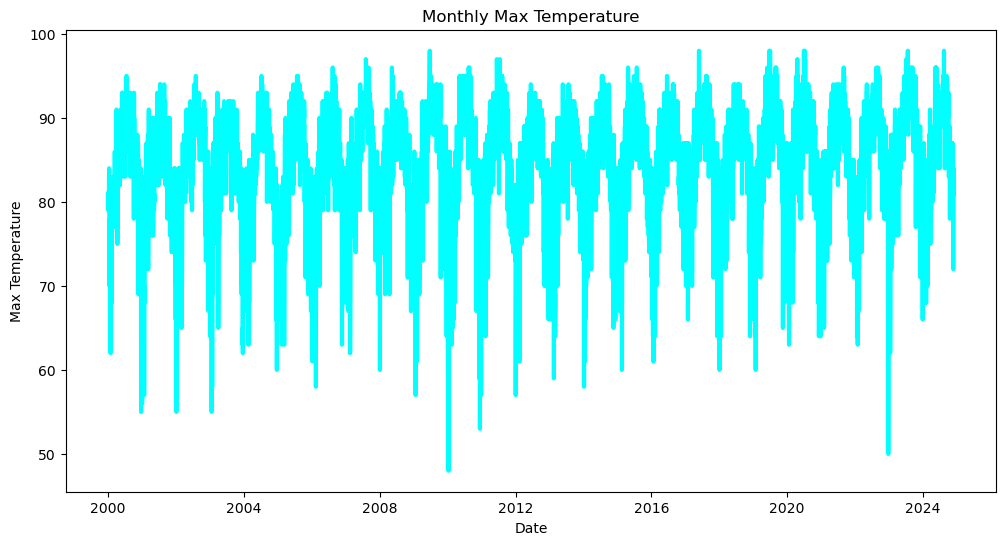

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(daily_maxtemp['actual_max_temp'], linewidth=3,c='cyan')
plt.title("Monthly Max Temperature")
plt.xlabel("Date")
plt.ylabel("Max Temperature")
plt.show()

## Check Stationary

In [5]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(daily_maxtemp['actual_max_temp'])

ADF Statistic: -6.811142694124533
p-value: 2.1147754238767754e-09
Stationary


## Plot 2 plots: ACF and PACF

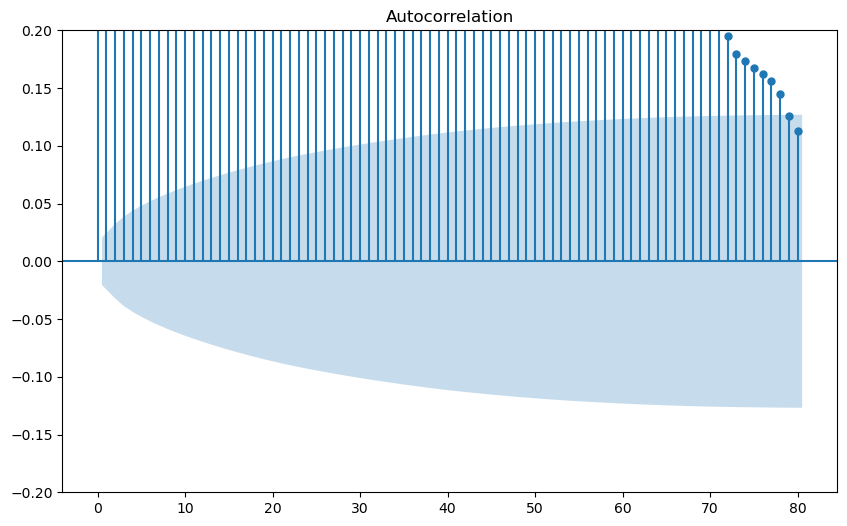

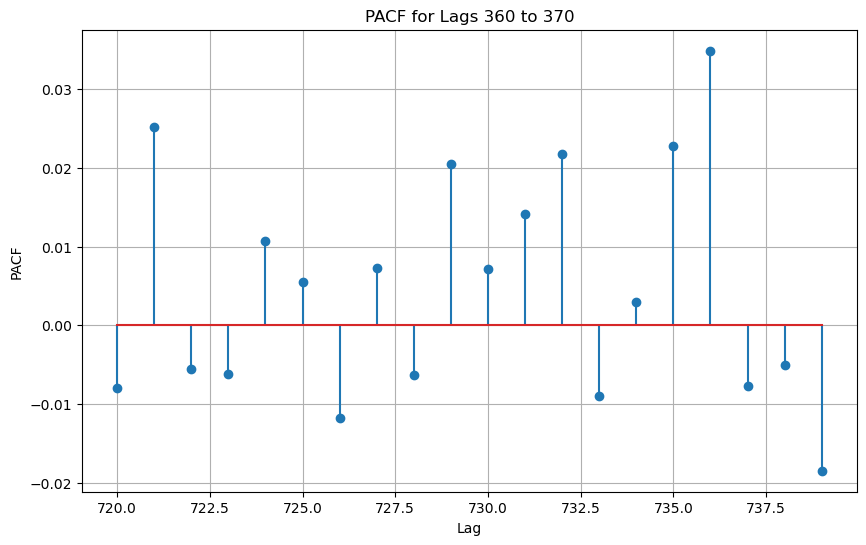

In [6]:
# Plot ACF and PACF
fig, ax = plt.subplots(figsize=(10, 6))

plot_acf(daily_maxtemp, lags=80, ax=ax)


# Plot PACF
# plot_pacf(daily_maxtemp, lags=370, ax=ax)

# Zoom in on the confidence intervals by adjusting the y-axis limits
# You can change the value below to zoom in further or adjust as needed
ax.set_ylim(-0.2, 0.2)

plt.show()
plt.show()
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(daily_maxtemp, nlags=800)

lags_subset = np.arange(720, 740)
pacf_subset = pacf_values[720:740]

# Plot the PACF values for lags 360 to 370
plt.figure(figsize=(10, 6))
plt.stem(lags_subset, pacf_subset)
plt.title("PACF for Lags 360 to 370")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid(True)
plt.show()

## Calculate P, D, Q, S

In [ ]:
# Define SARIMA parameters
p, d, q = 1, 0, 1
P, D, Q, s = 1, 1, 1, 365  # Assuming yearly seasonality

# Fit the SARIMA model
model = SARIMAX(daily_maxtemp, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

## Simple weekly hyperparams

In [12]:
def train_test(df, split_date):
    train = df[df.index < split_date]
    test = df[df.index >= split_date]
    return train, test

train, test = train_test(daily_maxtemp, '2022-01-01')

# Step 1: Add simple seasonality
# Use a larger training set (e.g., 80%)
# daily_maxtemp.index = pd.to_datetime(daily_maxtemp.index)
# split_index = int(len(daily_maxtemp) * 0.8)

# P, D, Q, s = 1, 1, 0, 7  # Weekly seasonality
# # model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(P, D, Q, s))
# results = model.fit(maxiter=50, disp=True)

# Evaluate
# forecast = results.forecast(steps=len(test_data))
# mse = mean_squared_error(test_data, forecast)
# print(f"MSE with Weekly Seasonality: {mse}")

test


,actual_max_temp
Datetime,
2022-01-01,82.0
2022-01-02,83.0
2022-01-03,81.0
2022-01-04,78.0
2022-01-05,81.0
...,...
2024-11-23,72.0
2024-11-24,78.0
2024-11-25,82.0


## More complicated

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 2. Fit the SARIMAX model on the training data
p, d, q = 1, 0, 1
P, D, Q, s = 1, 1, 1, 365  # Assuming yearly seasonality
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# 3. Forecast for the testing period
forecast = results.forecast(steps=len(test))

# 4. Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error on Test Data: {mse}")

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63035D+00    |proj g|=  7.41077D-02

At iterate    5    f=  2.52137D+00    |proj g|=  1.46523D-02


In [1]:
# results.save('sarima_model.pkl')
forecast

NameError: name 'forecast' is not defined

In [ ]:
# # Forecast future values
# forecast_periods = 12  # Forecast the next 12 months/ days?
# forecast = results.get_forecast(steps=forecast_periods)
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# # Plot the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(daily_maxtemp, label='Observed')
# plt.plot(forecast_mean, label='Forecast', color='red')

# plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
# plt.title("SARIMA Forecast Temperature")
# plt.xlabel("Date")
# plt.ylabel("Max Temperature")
# plt.legend()
# plt.show()

NameError: name 'results' is not defined